In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import os

In [2]:
def create_randwalk_frames(time,x,y,name):
    #add number of steps
    fig = plt.figure(figsize=(6, 6))
    for t in time:
        if t == max(time):
            clr='red'
            lbl='Stop'
            alph=1
            z_order=t
        elif t==min(time):
            clr='green'
            lbl='Start'
            alph=1
            z_order=max(time)+2
        else:
            clr='black'
            lbl=''
            alph=0.2
            z_order=t
        path_x=np.cumsum(x) 
        path_y=np.cumsum(y)
        plt.plot(path_x[:(t+1)], path_y[:(t+1)], color = 'grey' )
        plt.plot(path_x[t], path_y[t], color = clr, marker = 'o' ,label=lbl,alpha=alph,zorder=z_order) 
        #if t==min(time) or t==min(time):
            #plt.text(x+0.3,y+0.3,lbl,fontsize=9)
        x_limit=max(np.abs(min(path_x)),np.abs(max(path_x)))+1
        y_limit=max(np.abs(min(path_y)),np.abs(max(path_y)))+1
        max_limit=max(x_limit,y_limit)
        plt.xlim([-max_limit,max_limit])
        plt.xlabel('x', fontsize = 14)
        plt.ylim([-max_limit,max_limit])
        plt.ylabel('y', fontsize = 14)
        #plt.plot([], [], ' ', label=f'Step:{t}')
        if t == max(time):
            plt.legend()
        plt.title(f'Random walk on square lattice',
                fontsize=14)    
        plt.savefig(f'/work/DPCN/LAB4/images/{name}_{t}.png', 
                    transparent = False,  
                    facecolor = 'white'
                )
    
    plt.close()

In [3]:
N = 50
u = 2*np.random.randint(0,2,size=(N,2))-1
time=range(N)
x=u[:,0]
path_x=np.cumsum(x)
y=u[:,1]
create_randwalk_frames(time,x,y,'GIF')
#os.getcwd()
#print(path_x)

In [4]:
frames = []
for t in time:
    image = imageio.v2.imread(f'/work/DPCN/LAB4/images/GIF_{t}.png')
    frames.append(image)

imageio.mimsave('/work/DPCN/LAB4/example.gif', # output gif
                frames,
                format='GIF',          # array of input frames
                duration=5,)         # optional: frames per second

In [5]:
def pearsonRandWalk(N):
    angles=np.random.uniform(0,2*np.pi,N-1)
    steps=[(0,0)]
    for i in range(0,N-1):
        xr = np.cos(angles[i])
        yr = np.sin(angles[i])
        steps.append((xr,yr))
    directs=np.array(steps)
    postitions=np.cumsum(directs,axis=0)
    return postitions



In [6]:

N=1000



def pearsSim(n,N):
    As=[]
    Bs=[]
    for j in range(n):
        A=0
        B=0
        C=0
        res=pearsonRandWalk(N)
        
        for r in res:
            C+=1
            if r[0]>0:
                A+=1
                if r[1]>0:
                    B+=1
        As.append(A/C)
        Bs.append(B/C)
    return As,Bs






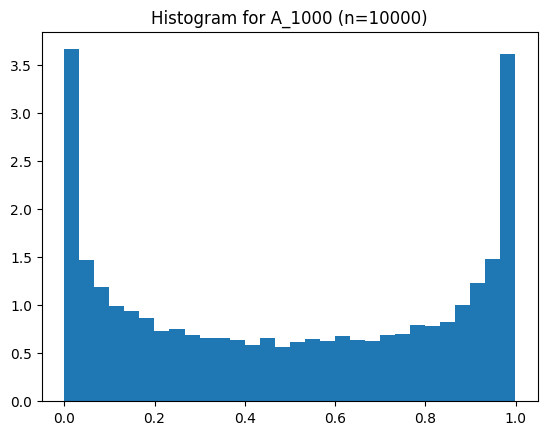

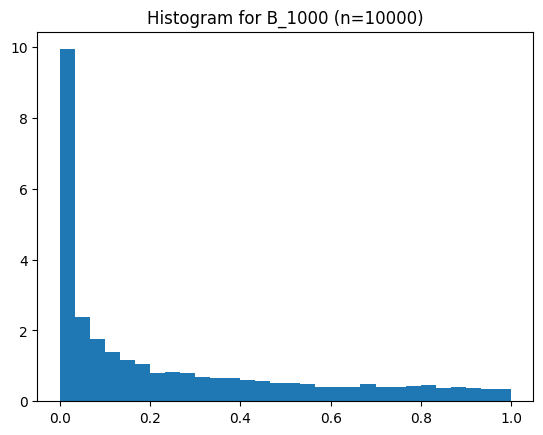

In [20]:
n=10000

As,Bs=pearsSim(n,N)

plt.figure(1)
plt.title("Histogram for A_1000 (n=10000)")
plt.hist(As,bins=30,density=True)

plt.figure(2)
plt.title("Histogram for B_1000 (n=10000)")
plt.hist(Bs,bins=30,density=True)
plt.show()

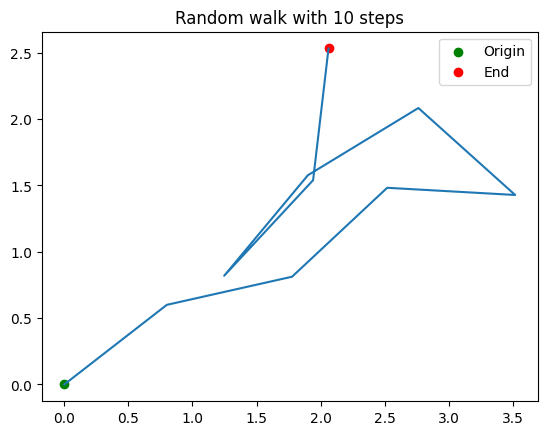

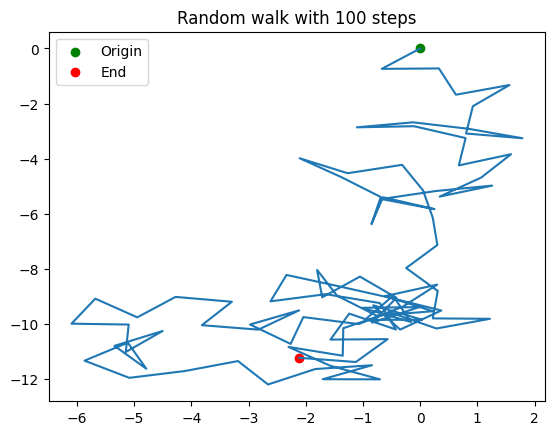

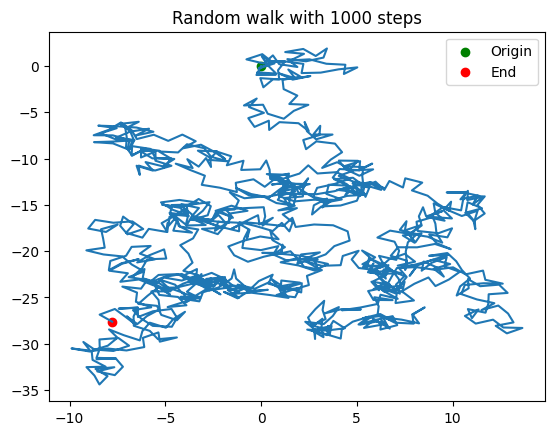

In [27]:
#Ilustrating several trajectories

res=pearsonRandWalk(10)
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
plt.figure(1)
plt.title("Random walk with 10 steps")
plt.scatter(0,0,c='g',label='Origin')
plt.scatter(x[-1],y[-1],c='r',label='End')
plt.plot(x,y)
plt.legend()

res=pearsonRandWalk(100)
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
plt.figure(2)
plt.title("Random walk with 100 steps")
plt.scatter(0,0,c='g',label='Origin')
plt.scatter(x[-1],y[-1],c='r',label='End')
plt.plot(x,y)
plt.legend()

res=pearsonRandWalk(1000)
x=[res[i][0] for i in range(len(res))]
y=[res[i][1] for i in range(len(res))]
plt.figure(3)
plt.title("Random walk with 1000 steps")
plt.scatter(0,0,c='g',label='Origin')
plt.scatter(x[-1],y[-1],c='r',label='End')
plt.plot(x,y)
plt.legend()

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2be72a1a-6ede-4702-bb85-1f84486961ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>